In [200]:
import pandas as pd
import requests
import pprint
import json
import time
from pandas import json_normalize
import ast

pd.set_option('display.max_colwidth', None) ## 셀 최대 너비 제한 해제

#### Units 테이블을 이진수로 처리한뒤 클러스터링

##### units 테이블을 한글 번역한 버전의 테이블 불러오기

In [201]:
units_df = pd.read_csv('C:/Users/user/Documents/GitHub/Final-Project-A09-/유닛 조합과 별갯수 테이블.csv')

units_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gameId         9288 non-null   object 
 1   game_datetime  9288 non-null   int64  
 2   game_length    9288 non-null   float64
 3   game_version   9288 non-null   object 
 4   puuid          9288 non-null   object 
 5   placement      9288 non-null   int64  
 6   last_round     9288 non-null   int64  
 7   level          9288 non-null   int64  
 8   시비르            9288 non-null   int64  
 9   리븐             9288 non-null   int64  
 10  쉔              9288 non-null   int64  
 11  탐 켄치           9288 non-null   int64  
 12  갈리오            9288 non-null   int64  
 13  카이사            9288 non-null   int64  
 14  사일러스           9288 non-null   int64  
 15  우디르            9288 non-null   int64  
 16  케일             9288 non-null   int64  
 17  케이틀린           9288 non-null   int64  
 18  렉사이     

##### 덱 클러스터링에서 기물의 유무만을 보기위해 시비르부터 자야까지 모든 컬럼의 값을 0 또는 1로 치환함

In [202]:
# 기존 데이터프레임을 뒤에서 join 해주기 위해 그대로 두어야하므로 복사하여 combination_clustering 변수에 할당

combination_clustering = units_df.copy()

# '시비르'부터 '자야'까지의 컬럼값이 0인 경우를 제외하고 모두 1로 변경

combination_clustering.loc[:, '시비르':'자야'] = combination_clustering.loc[:, '시비르':'자야'].applymap(lambda x: 0 if x == 0 else 1)
              # 시비르 컬럼부터 자야 컬럼까지 모든행을 선택                         # 선택한 모든 데이터(applymap)에 람다 함수를 적용
                                                                                 # 여기서 람다 함수는 x가 0이면 0 나머지는 1로 치환

# 작업 확인
combination_clustering.head()

,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,시비르,리븐,...,코부코,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination
0,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,7,28,8,1,1,...,0,0,0,0,0,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle"
1,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,mptEuTzeZ2MWsLxe4KfwLTr2iJp2uUphE7maw8CwGfeeFKXOVZ0_E8GccCzgNUfy0wiRJ1BGd1LOGQ,1,40,9,0,0,...,0,0,0,0,0,0,0,0,0,"TFT11_Caitlyn, TFT11_RekSai, TFT11_Jax, TFT11_Aatrox, TFT11_Kindred, TFT11_Senna, TFT11_Gnar, TFT11_Ornn, TFT11_Azir"
2,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,iM__viRIlCBc3VBF9p0BK9a58MsQTrB6Svi4asmtcw4vxkVZgPWgAB3ZY98VJHwbV2YhWUTzZr_XEQ,4,34,9,0,0,...,0,0,0,0,0,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong"
3,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,XwRIqTXBnBYgAU3Jct9FIDtrIOy01HBn4PUM6BecUex8D2MRFJlhDu2fcAvohMYPQrRGJK65ccfeCQ,8,27,9,0,0,...,0,0,0,0,0,0,0,0,0,"TFT11_TahmKench, TFT11_Sylas, TFT11_Udyr, TFT11_Ornn, TFT11_Hwei, TFT11_Rakan, TFT11_Annie, TFT11_Lillia, TFT11_Lissandra"
4,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,bAUTBjhuA00n1167MUmonjyMgetU3Dv1-5IGNUqWwWt-59C4f_W2hhtPLqZ5KQTNdoQCjExuuGszZg,6,28,8,0,1,...,0,0,0,0,0,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Udyr, TFT11_Kayle, TFT11_Ornn, TFT11_Janna, TFT11_Diana, TFT11_Zyra, TFT11_Morgana"


##### elbow method 를 이용하여 적절한 클러스터 갯수 찾기

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kme

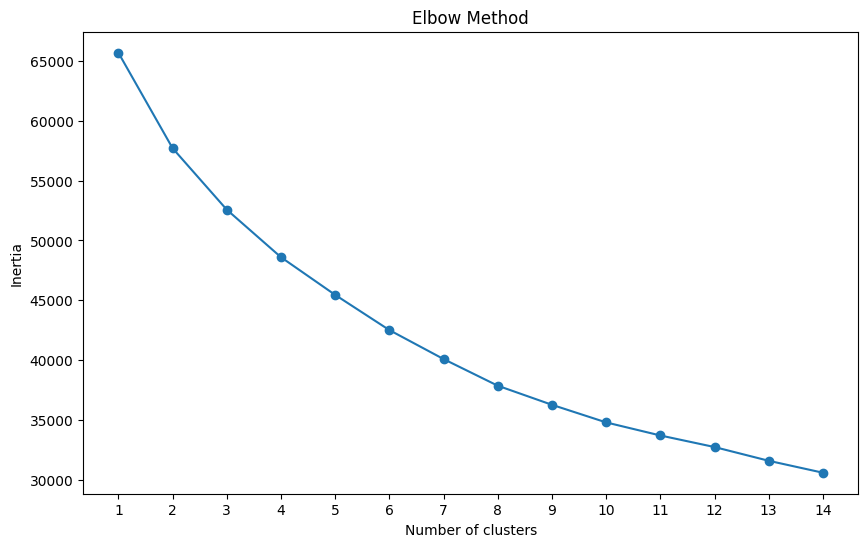

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 클러스터 개수 범위 설정
k_range = range(1, 15)  # 1부터 15까지의 클러스터 개수를 시도

# 챔피언 컬럼들로 사용할 이진 데이터 지정
binary_data = combination_clustering.loc[:, '시비르':'자야']  # 시비르 컬럼부터 자야 컬럼까지 모두 선택

# 각 클러스터 개수에 대한 K-means 모델을 적용하고 inertia 값을 저장
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(binary_data)
    inertia.append(kmeans.inertia_)

# 엘보우 메서드를 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-') 
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(k_range)
plt.show()

##### 특정할만한 elbow point 를 찾지 못했으므로 직접 클러스터 갯수를 조정하면서 살펴봐야함

In [204]:

# 클러스터 개수
num_clusters = 10

# K-means 모델 생성
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# 이진 데이터
binary_data = combination_clustering.loc[:, '시비르':'자야']

# 모델 피팅
kmeans.fit(binary_data)

# 군집 결과 확인
clusters = kmeans.labels_
print("Clusters:", clusters)

# 각 데이터 포인트가 속한 클러스터를 데이터프레임에 추가
combination_clustering['cluster'] = clusters

# 클러스터링 결과 출력
combination_clustering.head(1)

Clusters: [2 1 4 ... 9 1 9]


c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,시비르,리븐,...,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination,cluster
0,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,7,28,8,1,1,...,0,0,0,0,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle",2


##### 클러스터한 결과를 직접 보면서 제대로 클러스터링이 되었는지 확인

In [205]:
combination_clustering[combination_clustering['cluster'] == 8]

,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,시비르,리븐,...,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination,cluster
4,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,bAUTBjhuA00n1167MUmonjyMgetU3Dv1-5IGNUqWwWt-59C4f_W2hhtPLqZ5KQTNdoQCjExuuGszZg,6,28,8,0,1,...,0,0,0,0,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Udyr, TFT11_Kayle, TFT11_Ornn, TFT11_Janna, TFT11_Diana, TFT11_Zyra, TFT11_Morgana",8
7,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,yAVc-bTbi86qYF3ePtvTr0DTW367seRmnhXqPLIMwmw9xLZWbrw9uIX2wSTodseM41RIG-UnnGajOw,3,35,9,0,1,...,0,0,0,0,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Kayle, TFT11_Janna, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong, TFT11_LeeSin, TFT11_Irelia",8
26,KR_7005190828,1711586217976,2181.769775,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,mptEuTzeZ2MWsLxe4KfwLTr2iJp2uUphE7maw8CwGfeeFKXOVZ0_E8GccCzgNUfy0wiRJ1BGd1LOGQ,2,38,9,0,1,...,0,0,0,0,0,1,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Kayle, TFT11_Rakan, TFT11_WuKong, TFT11_Zyra, TFT11_Zoe, TFT11_LeeSin, TFT11_Irelia, TFT11_Garen",8
28,KR_7005190828,1711586217976,2181.769775,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,g7czitIBfBrL6554DeXJpZ_id1_2n0Cyzu0r0tTC__bQCfvKGWSoZN0vEWlNgfdIJGZ0HRODPhdKMA,6,32,9,0,1,...,0,0,0,0,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Kayle, TFT11_Janna, TFT11_Diana, TFT11_Rakan, TFT11_WuKong, TFT11_Zyra, TFT11_LeeSin, TFT11_Volibear",8
36,KR_7005187292,1711583884188,2441.186035,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,mptEuTzeZ2MWsLxe4KfwLTr2iJp2uUphE7maw8CwGfeeFKXOVZ0_E8GccCzgNUfy0wiRJ1BGd1LOGQ,4,35,9,1,1,...,0,0,0,0,0,1,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_Galio, TFT11_Kayle, TFT11_WuKong, TFT11_Zyra, TFT11_Zoe, TFT11_LeeSin, TFT11_Garen",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9259,KR_7005363791,1711606106897,2313.740234,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,eJBg1EVkQRS4fXbZKDAkyuQuYzL-kF1Ps7NOxHuwiAQ29VZgBEi20Je7sbVtqV-m-Y6ArWw2Hck5Iw,6,29,8,0,1,...,0,0,0,0,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Kayle, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Zyra, TFT11_Morgana, TFT11_LeeSin",8
9266,KR_7005336302,1711603214529,2313.343262,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,eJBg1EVkQRS4fXbZKDAkyuQuYzL-kF1Ps7NOxHuwiAQ29VZgBEi20Je7sbVtqV-m-Y6ArWw2Hck5Iw,1,38,10,0,1,...,0,0,0,0,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Kayle, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong, TFT11_Zyra, TFT11_Morgana, TFT11_Sett",8
9267,KR_7005336302,1711603214529,2313.343262,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,cfrChs9IliXQuiQKCCXpLzIRKmx9q_II1ruc4GJ_puH7ZDSaEU6OZszHJerUWJERWSIW3sm37Vterw,4,34,9,1,1,...,0,0,0,0,0,1,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Galio, TFT11_Sylas, TFT11_Kayle, TFT11_Rakan, TFT11_WuKong, TFT11_Zyra, TFT11_LeeSin, TFT11_Irelia, TFT11_Garen",8
9278,KR_7005149778,1711574024327,2346.074707,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,vONPZNRf3tyDkd_mWk-0nDUPAgDJb6gt6qI_9qKfiXIL7U1WnibUtiWE1Mx5uIM3OZYog3SoT8fPsw,6,28,9,0,1,...,0,0,0,0,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Kayle, TFT11_Soraka, TFT11_Diana, TFT11_Rakan, TFT11_WuKong, TFT11_Zyra, TFT11_Morgana, TFT11_Kayn",8


#### 생각보다 제대로 클러스터링이 되지 않았음을 확인, 챔피언 컬럼을 0과 1로 치환하지 않고 시도

##### 챔피언 컬럼을 0과 1로 치환하기 전의 데이터 프레임 사용

##### 엘보우 포인트 확인

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kme

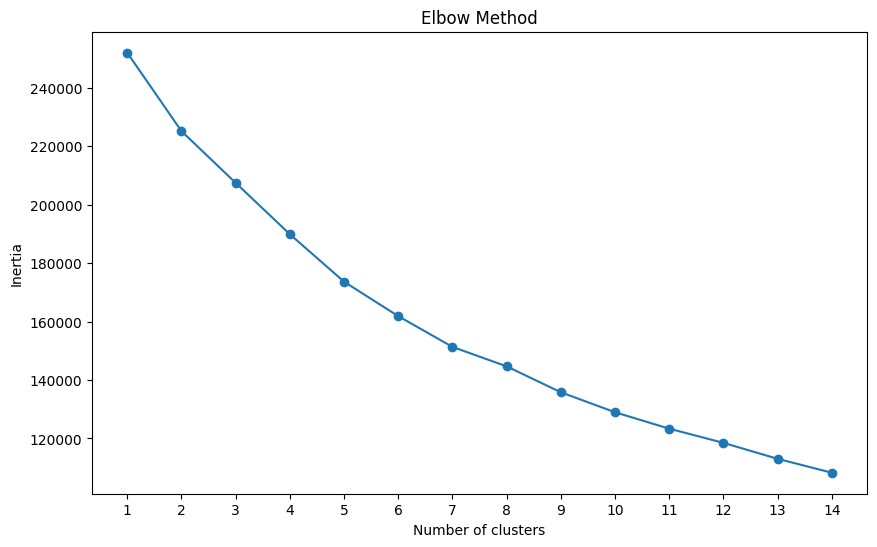

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 클러스터 개수 범위 설정
k_range = range(1, 15)  # 1부터 15까지의 클러스터 개수를 시도

# 챔피언 컬럼들로 사용할 이진 데이터 지정
binary_data = units_df.loc[:, '시비르':'자야']  # 시비르 컬럼부터 자야 컬럼까지 모두 선택

# 각 클러스터 개수에 대한 K-means 모델을 적용하고 inertia 값을 저장
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(binary_data)
    inertia.append(kmeans.inertia_)

# 엘보우 메서드를 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-') 
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(k_range)
plt.show()

##### 마찬가지로 정확한 엘보우 포인트는 생성되지않지만 그나마 8이 적당하다고 보임

##### 클러스터 갯수를 8로 설정하고 Kmeans 클러스터링 진행

##### 역시 원하는 대로 클러스터링 되지않았으므로 K 값을 임의로 변경하면서 시도

In [207]:

# 클러스터 개수
num_clusters = 9

# K-means 모델 생성
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# 이진 데이터
binary_data = units_df.loc[:, '시비르':'자야']

# 모델 피팅
kmeans.fit(binary_data)

# 군집 결과 확인
clusters = kmeans.labels_
print("Clusters:", clusters)

# 각 데이터 포인트가 속한 클러스터를 데이터프레임에 추가
units_df['unit_based_cluster'] = clusters

# 클러스터링 결과 출력
units_df.head(1)

Clusters: [2 5 1 ... 4 5 4]


c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,시비르,리븐,...,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination,unit_based_cluster
0,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,7,28,8,2,2,...,0,0,0,0,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle",2


##### 동일하게 각 클러스터 안의 데이터를 직접 확인하는 것으로 확인

In [208]:
units_df[units_df['unit_based_cluster'] == 4]

,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,시비르,리븐,...,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination,unit_based_cluster
14,KR_7005408175,1711608635465,2161.773926,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,sV7rWaPHoFjEfvl08t9S7g6GXaExIb_mFB5zJnjxrnpyz194sQ9cPmMXEmDMKxih5iWucZRngigxPA,2,37,8,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Soraka, TFT11_Neeko, TFT11_Zoe, TFT11_Illaoi, TFT11_Ahri, TFT11_Lux, TFT11_Amumu, TFT11_Syndra",4
19,KR_7005214080,1711588857166,2142.503418,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,LZ6lv1UG0xUMVNyzu-R4xTNkHietPz1rLIdevEkkzaTzQc15A3FZvJR1BnDIVnDvXJHcRay84sZCQw,7,32,9,0,0,...,3,1,2,0,0,0,0,0,"TFT11_Kindred, TFT11_WuKong, TFT11_Yasuo, TFT11_Yorick, TFT11_Ahri, TFT11_Lux, TFT11_Darius, TFT11_Aphelios, TFT11_Thresh",4
25,KR_7005190828,1711586217976,2181.769775,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,PZEo12ehEDEOPTJ25arc9uLxvd6vqmfRMtQAucAtipxtIMDMnxnjAj1fPt7ihFVCWVf_7h2QzSVs6A,4,35,8,0,0,...,3,2,2,0,0,0,0,0,"TFT11_Kindred, TFT11_Yasuo, TFT11_Sett, TFT11_Ahri, TFT11_Syndra, TFT11_Darius, TFT11_Aphelios, TFT11_Thresh",4
31,KR_7005190828,1711586217976,2181.769775,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BLKLr0C6Px7qhf5vNe5jyzYIK2h_QRO2T69teeCtMMU8rGEAV3ZK2hpKlZemnjl1Q6Ti5XnY5G1lRw,7,30,9,0,0,...,0,0,1,0,0,0,0,0,"TFT11_WuKong, TFT11_Lissandra, TFT11_Morgana, TFT11_Neeko, TFT11_Illaoi, TFT11_Ahri, TFT11_Lux, TFT11_Syndra, TFT11_Thresh",4
35,KR_7005187292,1711583884188,2441.186035,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,M6OtnT2Ad4fhM9Sj1fh1odtr0p4oO6rqxc6qtW_lPlrkX8wfqUm-LMYHb_SRi56T8-X0npFDIZj9GQ,1,42,9,0,0,...,0,3,3,0,0,0,0,0,"TFT11_Shen, TFT11_Yone, TFT11_Illaoi, TFT11_Ashe, TFT11_Sett, TFT11_Amumu, TFT11_Syndra, TFT11_Aphelios, TFT11_Thresh",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,KR_7005149778,1711574024327,2346.074707,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,M-JAW_v1qh8XOKOeeOfacTnxI6q644OKS8nveVJKe0wKCKeSspbRCBXtWghwj96SzjCvqTlTm62Zvg,3,33,8,0,0,...,2,1,2,0,0,0,0,0,"TFT11_Kindred, TFT11_Yasuo, TFT11_Sett, TFT11_Ahri, TFT11_Syndra, TFT11_Darius, TFT11_Aphelios, TFT11_Thresh",4
9277,KR_7005149778,1711574024327,2346.074707,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,LTmaSen-yhxKPL6YXrWl_Z_2eH9J4vCnHxAWIadYZzcndRck0SgUoBSQKyeRpd8W5k6Qj95YZPtoSg,2,38,9,0,0,...,0,2,2,0,0,0,0,0,"TFT11_Udyr, TFT11_Kindred, TFT11_Lissandra, TFT11_Yone, TFT11_Yasuo, TFT11_Sett, TFT11_Syndra, TFT11_Aphelios, TFT11_Thresh",4
9281,KR_7005139736,1711571877752,2173.421143,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,isHLordKTqogFpqDZ5fCHX8FsKdAPFLYZxPVb5-MeQuXV7qtso5qhL2bYU7ay4L3cU6pGoPgetcYXw,7,27,8,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Lissandra, TFT11_Illaoi, TFT11_Nautilus, TFT11_Sett, TFT11_Ahri, TFT11_Lux, TFT11_Amumu, TFT11_Syndra",4
9285,KR_7005139736,1711571877752,2173.421143,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,m-WJmbLS17zaoDDdN1NjqRMGuXkZChReSv8-36lQ32zgt2-TJU4Noj7CY246rk6qA0WmYVOE4kTogQ,1,37,8,0,0,...,0,3,3,0,0,0,0,0,"TFT11_Lissandra, TFT11_Illaoi, TFT11_Ashe, TFT11_Lux, TFT11_Amumu, TFT11_Syndra, TFT11_Aphelios, TFT11_Thresh",4


##### 0 과 1로 치환한 데이터보다는 정확성이 높은것으로 보이지만 역시나 제대로 클러스터링되지않음

##### 챔피언 컬럼으로 클러스터링하는 것이 무리가 있다고 판단됨

##### 컬럼수가 조금더 적고 확실한 기준이 될수 있는 시너지(traits) 데이터 프레임으로 시도해볼 필요가 있음

#### traits 테이블 불러오기

In [209]:
traits_df = pd.read_csv('C:/Users/user/Documents/GitHub/Final-Project-A09-/시너지 테이블.csv')

traits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gameId         9288 non-null   object 
 1   game_datetime  9288 non-null   int64  
 2   game_length    9288 non-null   float64
 3   game_version   9288 non-null   object 
 4   puuid          9288 non-null   object 
 5   placement      9288 non-null   int64  
 6   last_round     9288 non-null   int64  
 7   level          9288 non-null   int64  
 8   이타심            9288 non-null   int64  
 9   거대 괴수          9288 non-null   int64  
 10  난동꾼            9288 non-null   int64  
 11  귀인             9288 non-null   int64  
 12  혼령             9288 non-null   int64  
 13  먹그림자           9288 non-null   int64  
 14  신화             9288 non-null   int64  
 15  정령 주술사         9288 non-null   int64  
 16  이야기꾼           9288 non-null   int64  
 17  재주꾼            9288 non-null   int64  
 18  암영      

##### 기존 Units 테이블로 Kmeans Clustering 한 결과와 비교해서 보기위해 traits 테이블에 컬럼 추가

In [210]:
# units_df 데이터프레임에서 필요한 컬럼 선택

selected_columns = units_df[['Combination', 'unit_based_cluster']]

# traits_df와 units_df의 선택된 컬럼을 결합

traits_clustering = pd.merge(traits_df, selected_columns, how='left', left_index=True, right_index=True)

# 결합된 데이터프레임 출력

traits_clustering

,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,이타심,거대 괴수,...,호걸,천계,연인,현자,비전 마법사,행운,도자기,결투가,Combination,unit_based_cluster
0,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,7,28,8,0,1,...,0,0,0,0,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle",2
1,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,mptEuTzeZ2MWsLxe4KfwLTr2iJp2uUphE7maw8CwGfeeFKXOVZ0_E8GccCzgNUfy0wiRJ1BGd1LOGQ,1,40,9,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Caitlyn, TFT11_RekSai, TFT11_Jax, TFT11_Aatrox, TFT11_Kindred, TFT11_Senna, TFT11_Gnar, TFT11_Ornn, TFT11_Azir",5
2,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,iM__viRIlCBc3VBF9p0BK9a58MsQTrB6Svi4asmtcw4vxkVZgPWgAB3ZY98VJHwbV2YhWUTzZr_XEQ,4,34,9,1,1,...,1,1,1,1,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong",1
3,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,XwRIqTXBnBYgAU3Jct9FIDtrIOy01HBn4PUM6BecUex8D2MRFJlhDu2fcAvohMYPQrRGJK65ccfeCQ,8,27,9,0,1,...,0,0,1,0,0,0,0,0,"TFT11_TahmKench, TFT11_Sylas, TFT11_Udyr, TFT11_Ornn, TFT11_Hwei, TFT11_Rakan, TFT11_Annie, TFT11_Lillia, TFT11_Lissandra",1
4,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,bAUTBjhuA00n1167MUmonjyMgetU3Dv1-5IGNUqWwWt-59C4f_W2hhtPLqZ5KQTNdoQCjExuuGszZg,6,28,8,0,1,...,0,0,0,2,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Udyr, TFT11_Kayle, TFT11_Ornn, TFT11_Janna, TFT11_Diana, TFT11_Zyra, TFT11_Morgana",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,KR_7005139736,1711571877752,2173.421143,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,sMD7iMyWZ2ztcGvcYyXf92yYF6ui0ipF8UInDkKm6wMnJc7abC_rkU3WJokvCuiO4Rln3ltQCc3xTw,4,33,10,2,0,...,1,1,1,1,0,0,1,1,"TFT11_Riven, TFT11_Galio, TFT11_Kayle, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong, TFT11_Lissandra, TFT11_LeeSin, TFT11_Irelia",7
9284,KR_7005139736,1711571877752,2173.421143,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,4W5dMgFaI2qWXtzftLCjec16RypS_e_0BaHIynnzUApIEjpzmow5edpCgoq2Z7R4wwe8AhejYgf_sw,3,34,9,1,1,...,1,1,1,2,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Rakan, TFT11_WuKong, TFT11_Morgana",1
9285,KR_7005139736,1711571877752,2173.421143,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,m-WJmbLS17zaoDDdN1NjqRMGuXkZChReSv8-36lQ32zgt2-TJU4Noj7CY246rk6qA0WmYVOE4kTogQ,1,37,8,0,1,...,0,0,0,0,2,0,2,0,"TFT11_Lissandra, TFT11_Illaoi, TFT11_Ashe, TFT11_Lux, TFT11_Amumu, TFT11_Syndra, TFT11_Aphelios, TFT11_Thresh",4
9286,KR_7005139736,1711571877752,2173.421143,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,eJBg1EVkQRS4fXbZKDAkyuQuYzL-kF1Ps7NOxHuwiAQ29VZgBEi20Je7sbVtqV-m-Y6ArWw2Hck5Iw,6,28,8,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Shen, TFT11_Caitlyn, TFT11_Jax, TFT11_Aatrox, TFT11_Senna, TFT11_Morgana, TFT11_Kayn, TFT11_Illaoi",5


##### 마찬가지로 traits 컬럼을 이용하여 클러스터링하기 위해 엘보우 메서드 적용

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kme

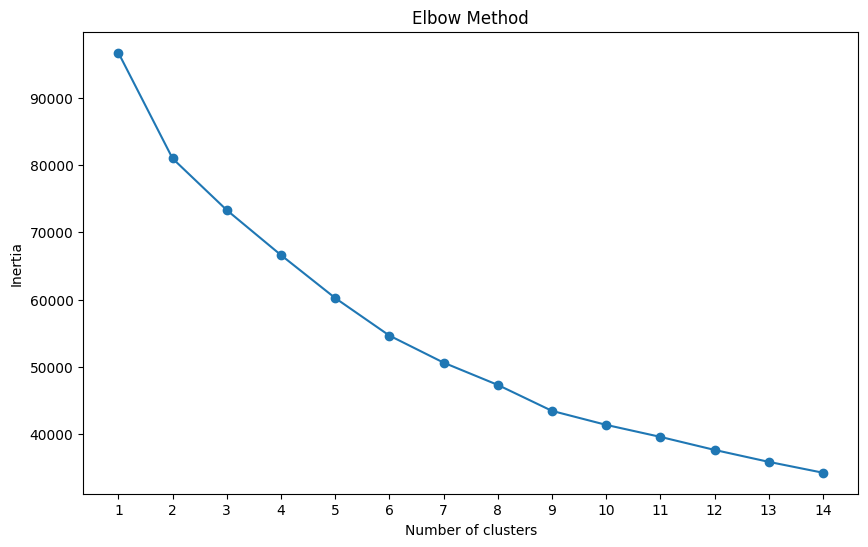

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 클러스터 개수 범위 설정
k_range = range(1, 15)  # 1부터 15까지의 클러스터 개수를 시도

# 챔피언 컬럼들로 사용할 이진 데이터 지정
binary_data = traits_clustering.loc[:, '이타심':'결투가']  # 이타심부터 결투가까지 모든 시너지 컬럼 선택

# 각 클러스터 개수에 대한 K-means 모델을 적용하고 inertia 값을 저장
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(binary_data)
    inertia.append(kmeans.inertia_)

# 엘보우 메서드를 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-') 
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(k_range)
plt.show()

##### 8이나 9 지점을 엘보우 포인트로 볼수는 있으나 크게 적절하지는 않아보임

##### K 값을 8, 9로 설정하여 클러스터링 진행

In [212]:
# 클러스터 개수 설정
num_clusters = 9

# K-means 모델 생성
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# 이진 데이터
binary_data = traits_clustering.loc[:, '이타심':'결투가']

# 모델 피팅
kmeans.fit(binary_data)

# 군집 결과 확인
clusters = kmeans.labels_
print("Clusters:", clusters)

# 각 데이터 포인트가 속한 클러스터를 데이터프레임에 추가
traits_clustering['traits_based_cluster'] = clusters

# 클러스터링 결과 출력
traits_clustering.head()

Clusters: [1 4 2 ... 3 4 3]


c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,이타심,거대 괴수,...,천계,연인,현자,비전 마법사,행운,도자기,결투가,Combination,unit_based_cluster,traits_based_cluster
0,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,7,28,8,0,1,...,0,0,0,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle",2,1
1,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,mptEuTzeZ2MWsLxe4KfwLTr2iJp2uUphE7maw8CwGfeeFKXOVZ0_E8GccCzgNUfy0wiRJ1BGd1LOGQ,1,40,9,0,0,...,0,0,0,0,0,0,0,"TFT11_Caitlyn, TFT11_RekSai, TFT11_Jax, TFT11_Aatrox, TFT11_Kindred, TFT11_Senna, TFT11_Gnar, TFT11_Ornn, TFT11_Azir",5,4
2,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,iM__viRIlCBc3VBF9p0BK9a58MsQTrB6Svi4asmtcw4vxkVZgPWgAB3ZY98VJHwbV2YhWUTzZr_XEQ,4,34,9,1,1,...,1,1,1,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong",1,2
3,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,XwRIqTXBnBYgAU3Jct9FIDtrIOy01HBn4PUM6BecUex8D2MRFJlhDu2fcAvohMYPQrRGJK65ccfeCQ,8,27,9,0,1,...,0,1,0,0,0,0,0,"TFT11_TahmKench, TFT11_Sylas, TFT11_Udyr, TFT11_Ornn, TFT11_Hwei, TFT11_Rakan, TFT11_Annie, TFT11_Lillia, TFT11_Lissandra",1,6
4,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,bAUTBjhuA00n1167MUmonjyMgetU3Dv1-5IGNUqWwWt-59C4f_W2hhtPLqZ5KQTNdoQCjExuuGszZg,6,28,8,0,1,...,0,0,2,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Udyr, TFT11_Kayle, TFT11_Ornn, TFT11_Janna, TFT11_Diana, TFT11_Zyra, TFT11_Morgana",7,7


##### 동일하게 8개의 군집으로 나누었을 때 클러스터링 결과가 꽤 차이나는 것을 확인 가능

##### 동일한 방식으로 클러스터링 적절한지 수동으로 체크

In [213]:
traits_clustering[traits_clustering['traits_based_cluster'] == 2]

,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,이타심,거대 괴수,...,천계,연인,현자,비전 마법사,행운,도자기,결투가,Combination,unit_based_cluster,traits_based_cluster
2,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,iM__viRIlCBc3VBF9p0BK9a58MsQTrB6Svi4asmtcw4vxkVZgPWgAB3ZY98VJHwbV2YhWUTzZr_XEQ,4,34,9,1,1,...,1,1,1,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong",1,2
17,KR_7005214080,1711588857166,2142.503418,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Bq-dNz0a_ae0oK4a7OwWHnnxDqIkKtR36iCb2wqq921tQRaoFt7b6KnZpyUiFWQy7JpTBmQ_Xqbuow,8,27,8,0,0,...,0,1,1,1,0,0,0,"TFT11_Janna, TFT11_Diana, TFT11_Rakan, TFT11_Lillia, TFT11_Morgana, TFT11_Neeko, TFT11_Illaoi, TFT11_Nautilus",1,2
27,KR_7005190828,1711586217976,2181.769775,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,2Qo57_yhTo4bJLL8j04v8yOHd9RYrwtjEpe1wqg0FOqHAouFcGM4Nc3LvRJKhWk5U90yuBybPj5Zrg,5,34,9,1,1,...,1,1,1,0,0,0,0,"TFT11_Galio, TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong",1,2
30,KR_7005190828,1711586217976,2181.769775,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,hc3eqePiD4mfeIUOT_ebQbR55hF232PQOKAMVI6-5tvdbPtmAcwjelA5-aSyuCUGsaIkGaAp3OmCaw,8,26,9,1,1,...,0,1,0,0,0,0,1,"TFT11_Udyr, TFT11_Ornn, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_Annie, TFT11_LeeSin, TFT11_Irelia",1,2
39,KR_7005187292,1711583884188,2441.186035,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Qd68F2UMKe7FMb-qpbUs3njG6k_4ZLwr2FRG0zHruSDr9XTtZOZ1cdAXyLd_kGAt0_IheL5QMQLdvQ,7,24,9,1,0,...,0,1,1,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Kayle, TFT11_Janna, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong, TFT11_Annie, TFT11_Zyra, TFT11_LeeSin",7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9257,KR_7005363791,1711606106897,2313.740234,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,eG1_kcqFzmU-o0933V3hvRk6CExYSZlka4TwNcvPzJgUMOD5P4eFwtK2zja4OcDXUZz-DwsFcPBvlQ,7,29,9,1,1,...,1,1,1,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong",1,2
9258,KR_7005363791,1711606106897,2313.740234,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,gSrJPhU-lMqn_b1hbJSuGf4tGLq_5Lz3BOowuBD8we2MNCJoqXaHuiwNNaHpTDje9VceLY_IWDdVTg,1,39,9,2,1,...,1,1,1,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong, TFT11_LeeSin",1,2
9273,KR_7005149778,1711574024327,2346.074707,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,eJBg1EVkQRS4fXbZKDAkyuQuYzL-kF1Ps7NOxHuwiAQ29VZgBEi20Je7sbVtqV-m-Y6ArWw2Hck5Iw,5,30,8,1,0,...,1,1,1,0,0,0,0,"TFT11_Galio, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong",1,2
9276,KR_7005149778,1711574024327,2346.074707,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,QeqQ4PTB0ght7N-sg_C4hTxrf9Cn1_xcSA3nbh_hmGaNgC--BQXpoYXc5wSkOeupikGXSK2Ao3_DXA,8,27,8,0,1,...,1,0,0,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Neeko, TFT11_Sett",1,2


In [214]:
##### traits 에 가중치를 줘야하나 (traits 값에 로그 스케일링)? 보통 3번째 시너지까지 켜야지 그 다음 시너지를 문장을 만들어서 키거나 하니까
##### 바꿔서 말하면 3시너지까지는 가중치를 점점 높게 주고 3시너지와 4시너지는 가중치를 적게준다?
##### 혹은 모든 특성을 보면서 키기 어려운지 쉬운지에 따라서 나름대로의 가중치를 책정한다?

##### 랭커들의 데이터이므로 덱의 유동성이 조금더 높을 것을 고려

##### 클러스터의 갯수를 늘려보고자 생각함 최소 10개 이상으로